In [1]:
import igraph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
#import teneto
from numpy import linalg as LA
from collections import OrderedDict
from operator import itemgetter
#import dynetx as dn

In [2]:
graph_data = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ",")

In [3]:
graph_data.head()

,node1,node2,timestamp
0,1,2,1
1,1,3,1
2,1,4,1
3,1,5,1
4,1,6,1


In [4]:
graph_data_nodes = graph_data.drop(["timestamp"], axis=1)

In [5]:
graph_data_nodes.head()

,node1,node2
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [6]:
G_predata = [tuple(x) for x in graph_data_nodes.values]

In [7]:
tuples = [tuple(x) for x in graph_data_nodes.values]

In [8]:
uniqueTup = list(set(tuples))

In [9]:
Gm = igraph.Graph.TupleList(uniqueTup, directed = False)

In [10]:
uniqueTup[:10]

[(50, 96),
 (32, 54),
 (14, 74),
 (74, 106),
 (38, 124),
 (48, 86),
 (104, 115),
 (16, 47),
 (72, 92),
 (1, 64)]

In [11]:
G_A_edgelist = list(set(tuple(sorted(i)) for i in G_predata))
# if you need tupleG_A_edgelist = tuple(set(tuple(sorted(i)) for i in G_predata))

In [12]:
testG = G_predata[1:5]
repeat_list = [(3,1),(1,3),(3,5)]
testG.extend(repeat_list)
testG

[(1, 3), (1, 4), (1, 5), (1, 6), (3, 1), (1, 3), (3, 5)]

## Question A

### 1)

In [13]:
# number of links and nodes in the network
igraph.summary(Gm, verbosity=0)

IGRAPH UN-- 167 3250 -- 
+ attr: name (v)


In [14]:
# graph density 
Gm.density(loops = False)

0.23447081740134187

In [15]:
# average degree of the network
average_degree = (2 * 3250)/167
average_degree

38.92215568862275

In [16]:
# degree variance
variance_degree = ((2*3250)*(pow(167,2) - 167 - (2*3250)))/(pow(167,3) + pow(167,2))
variance_degree

29.441331195607074

### 2)

In [17]:
graphNx = nx.Graph(uniqueTup)

In [18]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    fraction = [(degrees.count(i)/nx.number_of_nodes(graphNx)) for i in degrees]
    plt.bar(degrees,fraction)
    plt.show()

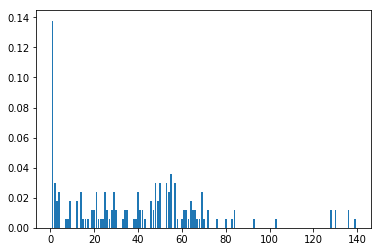

In [19]:
plot_degree_dist(graphNx)

### 3)

In [20]:
#degree assotivity
Gm.assortativity_degree(directed=False)

-0.2951772978930204

In [21]:
# the degree of the nodes are relatively disassortative

### 4)

In [22]:
# clustering coefficient
Gm.transitivity_undirected(mode="nan")

0.5412664316573972

### 5)

In [23]:
# average hop count/ average path length
Gm.average_path_length(directed=True)

1.9673905201644903

In [24]:
# diameter
Gm.diameter(directed=True)

5

### 6)

In [25]:
# A small world network is characterized by a small average shortest path length, and a large clustering coefficient.

    sigma = 

    C = nx.transitivity(G)
    L = nx.average_shortest_path_length(G)
    Cr = np.mean(randMetrics["C"])
    Lr = np.mean(randMetrics["L"])

    sigma = (C / Cr) / (L / Lr)


In [26]:
C = Gm.transitivity_undirected(mode="nan")

In [27]:
L = Gm.average_path_length(directed=True)

In [28]:
ranGraph = Gm.Erdos_Renyi(167, m=3250, directed=False, loops=False)

In [29]:
Cr = ranGraph.transitivity_undirected(mode="nan")

In [30]:
Lr = ranGraph.average_path_length(directed=True)

In [31]:
sigma = (C / Cr) / (L / Lr)

In [32]:
# if sigma >1, ( C >> Cr and L ~ Lr), network is small-world
sigma

2.0951823317146157

### 7)

In [33]:
## Small test graph

In [34]:
n = max(testG,key=lambda item:item[1])[1]

In [35]:
testG_a_matrix = np.zeros((n,n))

In [36]:
for node1,node2 in testG:
    testG_a_matrix[node1-1][node2-1] = 1
    testG_a_matrix[node2-1][node1-1] = 1
print(testG_a_matrix)

[[0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [37]:
w,v = LA.eig(testG_a_matrix)
testG_maxeigen = max(w)
print(w)
print(testG_maxeigen)

[-1.8136065   2.34292308  0.47068342  0.         -1.          0.        ]
2.3429230827771694


In [38]:
## Aggregated graph

In [39]:
Node = max(G_A_edgelist,key=lambda item:item[1])[1]

In [40]:
G_A_a_matrix = np.zeros((Node,Node))

In [41]:
for node1,node2 in G_A_edgelist:
    G_A_a_matrix[node1-1][node2-1] = 1
    G_A_a_matrix[node2-1][node1-1] = 1

In [42]:
w,v = LA.eig(G_A_a_matrix)
G_A_maxeigen = max(w)
print(G_A_maxeigen)

(60.63926551053454+0j)


### 8)

In [43]:
G_A_l_matrix = np.zeros((Node,Node))

In [44]:
for row in range(0,Node):
    G_A_l_matrix[row][row]= sum(G_A_a_matrix[row])

In [45]:
G_A_l_matrix = G_A_l_matrix-G_A_a_matrix

In [46]:
w,v = LA.eig(G_A_l_matrix)
G_A_l_maxeigen = max(w)
G_A_l_maxeigen

(140.00159026290203+0j)

In [47]:
G_A_l_eigin = list(w)
G_A_l_eigin.remove(G_A_l_maxeigen)
G_A_l_2nd_maxeigin = max(G_A_l_eigin)
G_A_l_2nd_maxeigin

(137.0092622410165+0j)

# Question B

### 9)

In [48]:
keymax=max(graph_data.timestamp)
keymax

57791

In [49]:
graph_data_nodes = graph_data.drop(["timestamp"], axis=1)

In [50]:
G_predata = [tuple(x) for x in graph_data_nodes.values]

In [51]:
testG = G_predata[1:5]
repeat_list = [(3,1),(1,3),(3,5)]
testG.extend(repeat_list)
testG

[(1, 3), (1, 4), (1, 5), (1, 6), (3, 1), (1, 3), (3, 5)]

In [52]:
key = range(1,keymax+1)
G_Temp = dict([(k,[]) for k in key])

for i in range(len(G_predata)):
    G_Temp[graph_data.timestamp[i]].append(G_predata[i])
print(G_Temp[keymax])

[(85, 94)]


In [53]:
len(G_Temp)

57791

In [54]:
G_Temp

{1: [(1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (1, 7),
  (1, 8),
  (1, 9),
  (1, 10),
  (1, 11),
  (1, 12),
  (1, 13),
  (1, 14),
  (1, 15),
  (1, 16),
  (1, 17)],
 2: [(18, 19)],
 3: [(18, 19)],
 4: [(3, 20)],
 5: [(20, 21)],
 6: [(20, 22)],
 7: [(20, 23)],
 8: [(24, 25)],
 9: [(26, 27)],
 10: [(28, 29)],
 11: [(1, 7)],
 12: [(29, 30)],
 13: [(28, 29)],
 14: [(11, 31), (11, 32), (11, 25), (11, 33)],
 15: [(11, 31)],
 16: [(11, 33)],
 17: [(1, 7)],
 18: [(21, 34)],
 19: [(3, 35)],
 20: [(36, 37), (36, 37)],
 21: [(11, 25)],
 22: [(24, 25)],
 23: [(21, 23)],
 24: [(36, 38)],
 25: [(21, 39)],
 26: [(3, 13), (13, 40), (8, 13), (13, 35), (13, 41), (4, 13)],
 27: [(42, 43)],
 28: [(42, 43)],
 29: [(42, 43)],
 30: [(42, 43)],
 31: [(42, 44)],
 32: [(26, 45)],
 33: [(21, 46)],
 34: [(3, 42)],
 35: [(1, 16)],
 36: [(1, 16)],
 37: [(47, 48)],
 38: [(8, 16)],
 39: [(47, 48)],
 40: [(8, 16)],
 41: [(42, 49)],
 42: [(21, 26)],
 43: [(21, 49)],
 44: [(26, 32)],
 45: [(22, 29)],
 46: [(3, 8)

In [55]:
## simulating

In [56]:
dicttest1 = {1: 3, 2: 100, 600: 700}
dicttest2 = {1: 8, 2: 190, 600: 800}
dicttest4 = {1: 87, 2: 1780, 600: 5400}
#averageDict(dicttest)
dict3 =  {**dicttest1, **dicttest2}
#mergeDict(dicttest1, dicttest2, dicttest4)
#dict6 = mergeDict(dict3, dicttest4, )
dict3

{1: 8, 2: 190, 600: 800}

In [57]:
def mergeDict(dict1, dict2, dict3):
   ''' Merge dictionaries and keep values of common keys in list'''
   dict4 = {**dict1, **dict2,}
   for key, value in dict3.items():
       if key in dict1 and key in dict2:
                #dict3[key] = (dict1[key] + dict2[key])
                #dict3[key] = [value , dict1[key]]
                dict4 = {**dict1, **dict2, **dict3}

   return dict3

In [58]:
def averageDict(dicti):
    dict_new = {}
    for i in dicti:
        dict_new[i] = (dicti[i] / 167)
        print(dicti[i])
    return dict_new

In [59]:
dict_test = {}
#dict_test.keys() = range(20)
#dict_test = dict_test.fromkeys(range(1, 55), [])
#print(dict_test[1])  #.append(4)

#dict_test[7].append(11)
for key in range(1,55):
    dict_test[key] = []


#.append(11)
dict_test[7].append(11)
dict_test

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [11],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: []}

In [60]:
#dict_infected_all = {}
#seed = 2

List_dict = {}
List_dict = List_dict.fromkeys(range(1, 10000), [])
for key in range(1, 10000):
    List_dict[key] = []

for s in range(1, 168):
    seed = s
    infected=[]
    infected.append(seed)
    Temp_I = {}
    time=0
    for i in range(1,10000):
        flag=0
        for j in range(len(G_Temp[i])):
            if (len(infected) < 167):      #max number of nodes infected for this seed node
                if (G_Temp[i][j][0] in infected) | (G_Temp[i][j][1] in infected):
                    infected.extend(list(G_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        
        List_dict[i].append(len(infected))
        
        #Temp_I[i] = len(infected)
            
        if flag==1:
            break

    # Merge dictionaries and add values of common keys in a list
    #List_dict = mergeDict(List_dict, Temp_I) #{**List_dict, **Temp_I}    #mergeDict(List_dict, Temp_I)

#print(List_dict)
#print(time)

In [61]:
np.std(List_dict[1]) #List_dict gives per time step the nodes that were infected at that time step

3.1084708436292723

In [62]:
len(List_dict)

9999

In [63]:
#averageDict = averageDict(List_dict)

In [64]:
#averageDict

In [65]:
std_dict = {}

for i in range(1, len(List_dict)+1):
    std = np.std(List_dict[i])
    std_dict[i] = std

print(std_dict)

{1: 3.1084708436292723, 2: 3.1068670550760196, 3: 3.1068670550760196, 4: 3.192914095230287, 5: 3.2829665564667025, 6: 3.378317662235333, 7: 3.480067252825856, 8: 3.47813998842092, 9: 3.4761703960634094, 10: 3.4741584037628166, 11: 3.557279358906892, 12: 3.557319677615696, 13: 3.557874013529067, 14: 4.483994508045286, 15: 4.491888139250755, 16: 4.491888139250755, 17: 4.491888139250755, 18: 4.586466739081034, 19: 4.681547264878105, 20: 4.678720204000206, 21: 4.679854298036594, 22: 4.919124319690794, 23: 4.919576228700896, 24: 4.917527728021545, 25: 5.020714379268721, 26: 6.082977685266658, 27: 6.079516598351647, 28: 6.079516598351647, 29: 6.079516598351647, 30: 6.079516598351647, 31: 6.076248278687303, 32: 6.072925061542612, 33: 6.169484063955748, 34: 6.432314035085723, 35: 6.432341907133769, 36: 6.432341907133769, 37: 6.428656174402581, 38: 6.453717650476017, 39: 6.453717650476017, 40: 6.453717650476017, 41: 6.718658938120105, 42: 6.818332304874818, 43: 7.006341154926559, 44: 7.18987399

In [66]:
average_dict = {}

for i in range(1, len(List_dict)+1):
    val = np.average(List_dict[i])
    average_dict[i] = val

average_dict.values()

dict_values([1.910179640718563, 1.9221556886227544, 1.9221556886227544, 1.9461077844311376, 1.9760479041916168, 2.0119760479041915, 2.053892215568862, 2.065868263473054, 2.0778443113772456, 2.089820359281437, 2.1497005988023954, 2.1676646706586826, 2.1736526946107784, 2.5089820359281436, 2.532934131736527, 2.532934131736527, 2.532934131736527, 2.568862275449102, 2.5988023952095807, 2.6107784431137726, 2.6167664670658684, 2.7005988023952097, 2.718562874251497, 2.7365269461077846, 2.7904191616766467, 3.251497005988024, 3.2634730538922154, 3.2634730538922154, 3.2634730538922154, 3.2634730538922154, 3.281437125748503, 3.2994011976047903, 3.3592814371257487, 3.467065868263473, 3.4730538922155687, 3.4730538922155687, 3.4850299401197606, 3.5269461077844313, 3.5269461077844313, 3.5269461077844313, 3.6407185628742513, 3.718562874251497, 3.8622754491017965, 3.9820359281437128, 4.0359281437125745, 5.179640718562874, 5.227544910179641, 5.3532934131736525, 5.461077844311378, 5.461077844311378, 5.46

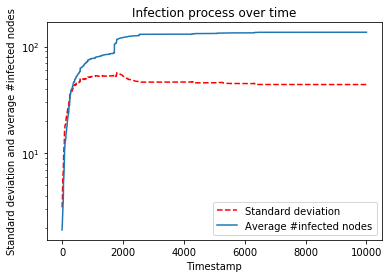

In [94]:
names_std = list(std_dict.keys())
values_std = list(std_dict.values())
names_average = list(average_dict.keys())
values_average = list(average_dict.values())

# Variables for variance
y1 = values_std 
x1 = range(len(std_dict))

# Variables for average
y2 = values_average 
x2 = range(len(average_dict))


plt.plot(x1, y1, 'r--', label='Standard deviation')
plt.plot(x2, y2, label='Average #infected nodes')
plt.yscale('log')

plt.ylabel('Standard deviation and average #infected nodes')
plt.xlabel('Timestamp')
plt.title('Infection process over time')
plt.legend()
plt.show()

### 10)

In [68]:
#iteration N=10
N=166

In [69]:
Time_80=[]
for seed in range(1,N+1):
    infected=[]
    time=0
    infected.append(seed)
    for i in range(1,keymax):
        flag=0
        for j in range(len(G_Temp[i])):
            if (len(infected) < 133):
                if (G_Temp[i][j][0] in infected) | (G_Temp[i][j][1] in infected):
                    infected.extend(list(G_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        if flag==1:
            break
    Time_80.append([time,seed])

In [70]:
Time_80_ranked=sorted(Time_80)
Time_80_ranked

[[1720, 1],
 [1720, 2],
 [1720, 3],
 [1720, 4],
 [1720, 5],
 [1720, 6],
 [1720, 7],
 [1720, 8],
 [1720, 9],
 [1720, 10],
 [1720, 11],
 [1720, 12],
 [1720, 13],
 [1720, 14],
 [1720, 15],
 [1720, 16],
 [1720, 17],
 [1720, 18],
 [1720, 19],
 [1720, 20],
 [1720, 21],
 [1720, 22],
 [1720, 23],
 [1720, 24],
 [1720, 25],
 [1720, 26],
 [1720, 27],
 [1720, 28],
 [1720, 29],
 [1720, 30],
 [1720, 31],
 [1720, 32],
 [1720, 33],
 [1720, 34],
 [1720, 35],
 [1720, 36],
 [1720, 37],
 [1720, 38],
 [1720, 39],
 [1720, 40],
 [1720, 41],
 [1720, 42],
 [1720, 43],
 [1720, 44],
 [1720, 45],
 [1720, 46],
 [1720, 47],
 [1720, 48],
 [1720, 49],
 [1720, 50],
 [1720, 51],
 [1720, 52],
 [1720, 53],
 [1720, 54],
 [1720, 55],
 [1720, 56],
 [1720, 57],
 [1720, 58],
 [1720, 59],
 [1720, 60],
 [1720, 61],
 [1720, 62],
 [1720, 63],
 [1720, 64],
 [1720, 65],
 [1720, 66],
 [1720, 67],
 [1720, 68],
 [1720, 69],
 [1720, 70],
 [1720, 71],
 [1720, 72],
 [1720, 73],
 [1720, 74],
 [1720, 75],
 [1720, 76],
 [1720, 77],
 [1720, 

In [71]:
R=np.zeros(N)
print()
for i in range(N):
    R[i]=Time_80_ranked[i][1]
R

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 114., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

### 11)

In [72]:
#clustering coefficient
clustering_coef = nx.clustering(graphNx)
cc_sorted = OrderedDict(sorted(clustering_coef.items(), key = itemgetter(1), reverse = True))
cc_sorted

OrderedDict([(127, 1.0),
             (135, 1.0),
             (129, 1.0),
             (126, 1.0),
             (114, 1.0),
             (134, 1.0),
             (132, 1.0),
             (160, 1.0),
             (131, 1.0),
             (120, 0.9848484848484849),
             (125, 0.9848484848484849),
             (118, 0.9632352941176471),
             (78, 0.9545454545454546),
             (119, 0.9428571428571428),
             (133, 0.9340659340659341),
             (128, 0.9230769230769231),
             (108, 0.9166666666666666),
             (123, 0.8953846153846153),
             (110, 0.8771929824561403),
             (41, 0.8738461538461538),
             (116, 0.8571428571428571),
             (28, 0.8538011695906432),
             (91, 0.8523809523809524),
             (124, 0.8466666666666667),
             (121, 0.8421052631578947),
             (55, 0.8399014778325123),
             (130, 0.8368421052631579),
             (11, 0.8366666666666667),
             (138, 0.

In [73]:
list(cc_sorted)[0]

127

In [74]:
N1 = 167
C=np.zeros(N1)
print()
for i in range(N1):
    C[i]=list(cc_sorted)[i]
C

array([127., 135., 129., 126., 114., 134., 132., 160., 131., 120., 125.,
       118.,  78., 119., 133., 128., 108., 123., 110.,  41., 116.,  28.,
        91., 124., 121.,  55., 130.,  11., 138.,  96.,  99.,  12., 149.,
       103.,  52., 122.,  17., 109., 102., 107.,  16., 136., 151., 105.,
        61.,  49.,  85.,  89.,  92.,  24., 111.,  51.,  77.,  60.,  34.,
        87.,  19., 100.,  67.,  25.,  64.,  79.,  97.,  75.,  95.,  43.,
        72.,  76., 106.,  74., 101.,  62.,  30.,  65.,  66.,  36.,  39.,
        88.,  73.,   9.,  81., 117.,  82.,  48.,  98.,  58.,  59.,  93.,
         5.,  22.,   8., 104.,  44., 112.,  80.,  31.,  70.,  27.,  15.,
        21.,  71.,  90.,  53.,  33.,  69.,  68.,  83.,  26.,  20.,  56.,
        13.,  10.,  14.,  86.,  54.,  32.,   6.,  63.,  94.,   4.,  40.,
        84.,   3.,   7.,   2.,  57.,  29.,  42.,  18.,  23., 115.,  50.,
        46.,  35., 113.,   1.,  47.,  45.,  37.,  38., 164., 146., 147.,
       162., 163., 159., 144., 157., 145., 165., 16

In [75]:
#degrees of the nodes 
degrees = dict(graphNx.degree())
degrees_sorted = OrderedDict(sorted(degrees.items(), key = itemgetter(1), reverse = True))
degrees_sorted

OrderedDict([(38, 139),
             (45, 136),
             (37, 136),
             (47, 130),
             (1, 130),
             (35, 128),
             (113, 128),
             (115, 103),
             (50, 93),
             (46, 84),
             (42, 84),
             (18, 83),
             (23, 80),
             (7, 76),
             (94, 72),
             (69, 72),
             (90, 70),
             (86, 69),
             (56, 69),
             (29, 69),
             (2, 69),
             (3, 68),
             (84, 67),
             (27, 66),
             (68, 66),
             (14, 65),
             (4, 65),
             (15, 64),
             (13, 64),
             (112, 64),
             (9, 63),
             (32, 62),
             (44, 62),
             (70, 61),
             (10, 61),
             (80, 60),
             (59, 58),
             (63, 57),
             (40, 57),
             (8, 57),
             (83, 57),
             (66, 57),
             (48, 55),
       

In [76]:
D=np.zeros(N1)
print()
for i in range(N1):
    D[i]=list(degrees_sorted)[i]
D[:10]

array([ 38.,  45.,  37.,  47.,   1.,  35., 113., 115.,  50.,  46.])

In [77]:
#Rrd(f) 
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rrdf = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    Df = D[:numNodes]
    InterRD = np.intersect1d(Rf, Df)
    Rrdf_i = len(InterRD)/len(Rf)
    Rrdf.append(Rrdf_i)
    
print(Rrdf)

[0.125, 0.125, 0.24, 0.42424242424242425, 0.4878048780487805, 0.6, 0.6379310344827587, 0.6666666666666666, 0.7466666666666667, 0.8192771084337349]


In [78]:
#Rrc(f) 
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rrcf = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    Cf = C[:numNodes]
    InterRC = np.intersect1d(Rf, Cf)
    Rrcf_i = len(InterRC)/len(Rf)
    Rrcf.append(Rrcf_i)
    
print(Rrcf)

[0.0, 0.0, 0.0, 0.09090909090909091, 0.14634146341463414, 0.16, 0.22413793103448276, 0.2727272727272727, 0.3466666666666667, 0.43373493975903615]


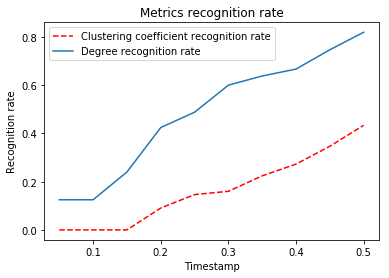

In [79]:
# Clustering coefficient recognition rate
y1 = Rrcf
x1 = f

# Degree recognition rate
y2 = Rrdf 
x2 = f


plt.plot(x1, y1, 'r--', label='Clustering coefficient recognition rate')
plt.plot(x2, y2, label='Degree recognition rate')

plt.ylabel('Recognition rate')
plt.xlabel('Timestamp')
plt.title('Metrics recognition rate')
plt.legend()
plt.show()

In [80]:
## Degree can better predict predict the influence of nodes

### 12)

### Metric 1: Closeness centrality

In [81]:
# Eigenvalue centrality
eigen_centrality = nx.eigenvector_centrality(graphNx, weight = 'weights')
EC_sorted = OrderedDict(sorted(eigen_centrality.items(), key = itemgetter(1), reverse = True))
EC_sorted


OrderedDict([(38, 0.1710668323828997),
             (45, 0.17022090222994946),
             (37, 0.16984954850432213),
             (1, 0.1695246765959596),
             (47, 0.1689588411622532),
             (35, 0.16876559638582417),
             (113, 0.16876559638582417),
             (115, 0.1491564223272743),
             (50, 0.13191101983787132),
             (42, 0.12989891691993466),
             (18, 0.1265286750607161),
             (7, 0.1209651464398492),
             (69, 0.11735020572330833),
             (23, 0.11593550211004584),
             (46, 0.11519921230366698),
             (90, 0.11507948395129262),
             (94, 0.1139865751871372),
             (56, 0.11259055559954852),
             (86, 0.11081487149558171),
             (2, 0.10931415206544558),
             (27, 0.10915363816654253),
             (68, 0.10751265604346745),
             (29, 0.10714261423134615),
             (9, 0.10658998526282278),
             (3, 0.10655661513902212),
          

In [82]:
N1 = 167
EC=np.zeros(N1)
print()
for i in range(N1):
    EC[i]=list(EC_sorted)[i]
EC

array([ 38.,  45.,  37.,   1.,  47.,  35., 113., 115.,  50.,  42.,  18.,
         7.,  69.,  23.,  46.,  90.,  94.,  56.,  86.,   2.,  27.,  68.,
        29.,   9.,   3., 112.,  84.,  14.,  13.,  15.,  44.,   4.,  70.,
        80.,  32.,  59.,  10.,  66.,   8.,  48.,  83.,  72.,  22.,  93.,
        63.,  21.,  81., 104.,  53.,  71.,   5.,  40.,  58.,  67., 117.,
        31.,  43.,  26.,  95.,  76.,  85.,  30.,  77.,  57.,  65.,  75.,
        74.,  20.,  33.,  62.,  98.,  88.,  39.,  54.,   6.,  24., 100.,
        87.,  36.,  79.,  64.,  82.,  73.,  19.,  89.,  17., 151.,  49.,
       101.,  34.,  25.,  55.,  52.,  51.,  61., 123.,  41., 105., 109.,
        60., 106., 124., 107.,  12., 103.,  16.,  11.,  96.,  91.,  99.,
       149., 102., 130., 110.,  28., 118., 121., 111., 119., 108., 128.,
       133., 122., 125.,  78., 120.,  92., 129., 126., 136., 116.,  97.,
       134., 127., 114., 138., 135., 132., 131., 160., 144., 139., 167.,
       165., 159., 164., 163., 142., 145., 166., 15

### Metric 2: Betweenness centrality

In [83]:
## Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graphNx)
betweenness_sorted = OrderedDict(sorted(betweenness_centrality.items(), key = itemgetter(1), reverse = True))
betweenness_sorted

OrderedDict([(38, 0.08242003796017484),
             (37, 0.06496273893787789),
             (45, 0.06469467860408137),
             (47, 0.05236665665800161),
             (1, 0.040290342374838486),
             (68, 0.03869156858121181),
             (35, 0.0364287926478484),
             (113, 0.0364287926478484),
             (84, 0.03361635159102187),
             (80, 0.026423038140718225),
             (59, 0.02620999482131866),
             (23, 0.02127831399890789),
             (57, 0.02069227892794181),
             (26, 0.020425378501198785),
             (18, 0.019949765751694992),
             (86, 0.0164234219646966),
             (46, 0.016264372340837552),
             (115, 0.015935225445480806),
             (15, 0.01503585989628194),
             (53, 0.015019492709188132),
             (50, 0.014804910329580784),
             (104, 0.013941242372284236),
             (36, 0.01312496161661383),
             (64, 0.012872140495785367),
             (2, 0.012557335415

In [84]:
N1 = 167
B=np.zeros(N1)
print()
for i in range(N1):
    B[i]=list(betweenness_sorted)[i]
B

array([ 38.,  37.,  45.,  47.,   1.,  68.,  35., 113.,  84.,  80.,  59.,
        23.,  57.,  26.,  18.,  86.,  46., 115.,  15.,  53.,  50., 104.,
        36.,  64.,   2., 122., 146.,  97., 136.,  14.,  81.,  42.,  32.,
        29.,   3.,  94.,   7.,  90.,  63.,  69.,  56.,   4.,  51., 112.,
        40., 102.,  13.,  27.,  10.,  44.,   9.,  70.,   8.,  21.,  83.,
        71.,  93.,  20.,  48.,  66.,   6.,  31., 117.,  22.,  39.,  54.,
         5.,  33.,  58.,  65.,  72.,  88.,  98.,  74.,  30.,  76.,  62.,
       101.,  73.,  82.,  43.,  95.,  67.,  75.,  79.,  77.,  85., 100.,
        19.,  24.,  89.,  87.,  25., 103., 106.,  34., 151.,  60.,  49.,
        17., 105.,  61., 109.,  52., 107.,  16.,  55.,  12., 149., 111.,
        99., 124.,  96.,  41.,  92.,  11., 123., 130., 121.,  91.,  28.,
       110., 108., 116., 133., 128., 119., 118., 139.,  78., 165., 159.,
       120., 125., 138., 127., 135., 129., 164., 147., 126., 162., 114.,
       134., 132., 163., 144., 157., 160., 145., 13

In [85]:
### compare

In [86]:
##Closeness centrality and Influence
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rref = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    Ef = EC[:numNodes] #Dit is EC toch? Stond vm E maar bij mij kende die geen E (dus error dat E niet gedefinieerd was)
    InterRE = np.intersect1d(Rf, Ef)
    Rref_i = len(InterRE)/len(Rf)
    Rref.append(Rref_i)
    
print(Rref)

[0.125, 0.125, 0.28, 0.3939393939393939, 0.4634146341463415, 0.56, 0.6206896551724138, 0.6363636363636364, 0.7466666666666667, 0.8072289156626506]


In [87]:
##Betweenness and Influence
##Rrb(f) 
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rrbf = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    Bf = B[:numNodes]
    InterRB = np.intersect1d(Rf, Bf)
    Rrbf_i = len(InterRB)/len(Rf)
    Rrbf.append(Rrbf_i)
    
print(Rrbf)

[0.125, 0.0625, 0.2, 0.24242424242424243, 0.36585365853658536, 0.52, 0.5862068965517241, 0.6666666666666666, 0.7333333333333333, 0.7710843373493976]


### Metric 3: Temporal node Degree (Temporal node centrality metric)

In [88]:
#Degree weighted by the time. See defintion "Nodal Measure: Temporal Centrality" in Thompson, W. H., Brantefors, P., & Fransson, P. (2017). From static to temporal
    #network theory: Applications to functional brain connectivity. Network Neuroscience, 1(2), 69-99.
#Nodal Measure: Temporal Centrality of nodes
#The following code counts the number of times a node has a contact over the range of time.

degrees_node1 = graph_data_nodes["node1"].value_counts().sort_values(ascending = False)
degrees_node2 = graph_data_nodes["node2"].value_counts().sort_values(ascending = False)
dict_degrees_node1 = degrees_node1.to_dict()
dict_degrees_node2 = degrees_node2.to_dict()
Temp_Degree_dict = {**dict_degrees_node1, **dict_degrees_node2}
Temp_Degree_dict
len(Temp_Degree_dict)

167

In [89]:
Temp_Degree_dict_sorted = OrderedDict(sorted(Temp_Degree_dict.items(), key = itemgetter(1), reverse = True))
Temp_Degree_dict_sorted

OrderedDict([(94, 3884),
             (1, 3376),
             (14, 3238),
             (86, 3057),
             (76, 2543),
             (84, 2264),
             (68, 1972),
             (66, 1941),
             (13, 1915),
             (50, 1879),
             (96, 1838),
             (54, 1626),
             (88, 1500),
             (70, 1498),
             (67, 1478),
             (69, 1441),
             (75, 1305),
             (59, 1252),
             (56, 1235),
             (40, 1174),
             (85, 1174),
             (74, 1156),
             (83, 1145),
             (53, 1140),
             (38, 1103),
             (80, 1070),
             (8, 1053),
             (72, 1039),
             (95, 1035),
             (17, 1007),
             (90, 1004),
             (35, 958),
             (77, 915),
             (73, 860),
             (32, 840),
             (117, 824),
             (4, 811),
             (81, 801),
             (115, 778),
             (45, 773),
          

In [90]:
N1 = 167
TD=np.zeros(N1) #Temporal Degree
for i in range(N1):
    TD[i]=list(Temp_Degree_dict_sorted)[i]
TD

array([ 94.,   1.,  14.,  86.,  76.,  84.,  68.,  66.,  13.,  50.,  96.,
        54.,  88.,  70.,  67.,  69.,  75.,  59.,  56.,  40.,  85.,  74.,
        83.,  53.,  38.,  80.,   8.,  72.,  95.,  17.,  90.,  35.,  77.,
        73.,  32., 117.,   4.,  81., 115.,  45.,  15.,  42.,  58.,  71.,
       106., 101.,  65.,  27.,  93.,  43.,  20.,  51.,  33.,  48., 104.,
        52.,  98.,  89., 112.,  63.,  11.,  47.,  39.,  44.,  29.,  57.,
        18.,  30.,  26.,  82.,  79.,  61.,  31.,  62., 123., 105.,  64.,
       121.,   9.,  37., 113., 103.,   7.,  19.,  16.,   6.,  22.,  10.,
        92., 124., 107.,  55.,  41.,  34., 109.,  21.,  46.,  24., 108.,
        25.,  99.,  87., 151., 100.,  60.,  12.,   3.,   2., 149., 119.,
         5., 120., 110., 116.,  91.,  49., 111., 138., 145., 139.,  23.,
       140., 148., 144., 128., 118.,  36.,  28., 141., 143., 134., 150.,
       130., 122., 102.,  78., 142., 133.,  97., 129., 146., 125., 126.,
       152., 153., 136., 147., 114., 137., 131., 13

In [91]:
##Temporal Degree Node and Influence
##Rrtd(f) 

f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rrtd = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    TDf = TD[:numNodes]
    InterRTD = np.intersect1d(Rf, TDf)
    Rrtd_i = len(InterRTD)/len(Rf)
    Rrtd.append(Rrtd_i)
    
print(Rrtd)

[0.125, 0.1875, 0.12, 0.15151515151515152, 0.2682926829268293, 0.32, 0.43103448275862066, 0.5303030303030303, 0.6666666666666666, 0.7349397590361446]


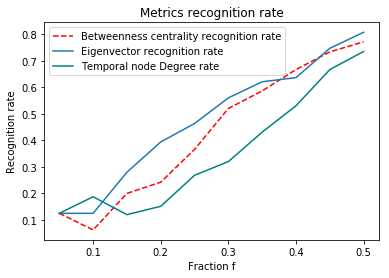

In [92]:
#Betweenness
y1 = Rrbf
x1 = f

#Closeness centrality
y2 = Rref 
x2 = f

#Temporal node degree
y5 = Rrtd 
x5 = f

plt.plot(x1, y1, 'r--', label='Betweenness centrality recognition rate')
plt.plot(x2, y2, label='Eigenvector recognition rate')
plt.plot(x5, y5, 'teal', label='Temporal node Degree rate')

plt.ylabel('Recognition rate')
plt.xlabel('Fraction f')
plt.title('Metrics recognition rate')
plt.legend()
plt.show()

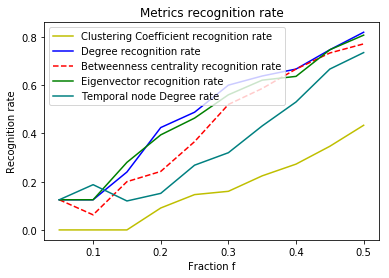

In [93]:
#Clustering coefficient
y1 = Rrcf
x1 = f

#Degree
y2 = Rrdf 
x2 = f

#Betweenness
y3 = Rrbf
x3 = f

#Closeness centrality
y4 = Rref 
x4 = f

#Temporal node degree
y5 = Rrtd 
x5 = f


plt.plot(x1, y1, 'y', label='Clustering Coefficient recognition rate')
plt.plot(x2, y2, 'b', label='Degree recognition rate')


plt.plot(x3, y3, 'r--', label='Betweenness centrality recognition rate')
plt.plot(x4, y4, 'g', label='Eigenvector recognition rate')

plt.plot(x5, y5, 'teal', label='Temporal node Degree rate')

plt.ylabel('Recognition rate')
plt.xlabel('Fraction f')
plt.title('Metrics recognition rate')
plt.legend()
plt.show()